In [1]:
#%pip install strawberryfields --upgrade
import numpy as np
import strawberryfields as sf
import matplotlib.pyplot as plt
import time
from strawberryfields import RemoteEngine
from strawberryfields.ops import *
from random import shuffle
from random import seed
from collections import OrderedDict

In [2]:
start_BS_Time = time.time()

#We create an 4-mode quantum program
boson_sampling = sf.Program(6) 

with boson_sampling.context as q:
    # prepare the input fock states
    Fock(1) | q[0]
    Fock(1) | q[1]
    Vac     | q[2]
    Fock(1) | q[3]
    Fock(1) | q[4]
    Vac     | q[5]

    # rotation gates
    Rgate(0.5719)  | q[0]
    Rgate(-1.9782) | q[1]
    Rgate(2.0603)  | q[2]
    Rgate(0.0644)  | q[3]
    Rgate(0.5719)  | q[4]
    Rgate(-1.9782) | q[5]

    # beamsplitter array
    BSgate(0.7804, 0.8578)  | (q[0], q[1])
    BSgate(0.06406, 0.5165) | (q[2], q[3])
    BSgate(0.06406, 0.5165) | (q[4], q[5])
    BSgate(0.06406, 0.5165) | (q[3], q[4])
    BSgate(0.06406, 0.5165) | (q[2], q[3])
    BSgate(0.473, 0.1176)   | (q[1], q[2])
    BSgate(0.563, 0.1517)   | (q[0], q[1])
    BSgate(0.06406, 0.5165) | (q[4], q[5])
    BSgate(0.06406, 0.5165) | (q[3], q[4])
    BSgate(0.06406, 0.5165) | (q[2], q[3])
    BSgate(0.473, 0.1176)   | (q[1], q[2])
    BSgate(0.563, 0.1517)   | (q[0], q[1])
    
eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 3})
#eng = sf.RemoteEngine("X8_01", backend_options={"cutoff_dim": 3})

# We can now execute the program with the engine:
results = eng.run(boson_sampling, shots=400000)

# extract the joint Fock probabilities
probs = results.state.all_fock_probs()
#probs1 = results.state

#Calculate Time of Boson Samplers
end_BS_Time = time.time()
my_BS_Time = end_BS_Time - start_BS_Time
print("The execution time for Boson Samplers is :", my_BS_Time)

The execution time for Boson Samplers is : 14.918179512023926


|000202>: 1.9707675392462803e-13
|000211>: 1.4801062153538268e-10
|000220>: 1.1284234557840633e-08
|001102>: 2.6034588522485773e-10
|001111>: 1.9552765873669654e-07
|001120>: 1.4906902902254583e-05
|001201>: 1.4754227419126318e-05
|001210>: 0.0008542998821843126
|002002>: 8.400055994750156e-08
|002011>: 6.308696911003957e-05
|002020>: 0.004809709935653182
|002101>: 0.0023442200372886983
|002110>: 0.1357240032472093
|002200>: 0.004601595475921783
|010102>: 9.688570413399143e-12
|010111>: 7.276410333128218e-09
|010120>: 5.547488422544427e-07
|010201>: 5.405566433814489e-07
|010210>: 3.1292424778162885e-05
|011002>: 2.500834308052186e-08
|011011>: 1.8782024410315624e-05
|011020>: 0.0014319294569439007
|011101>: 0.0007035520797499533
|011110>: 0.04073298839095876
|011200>: 0.0013944273934773399
|012001>: 2.5884403439924763e-05
|012010>: 0.0015164286055354768
|012100>: 6.0534141892684546e-05
|020002>: 1.425550282572848e-07
|020011>: 0.00010706315136195276
|020020>: 0.008162425776862652
|020

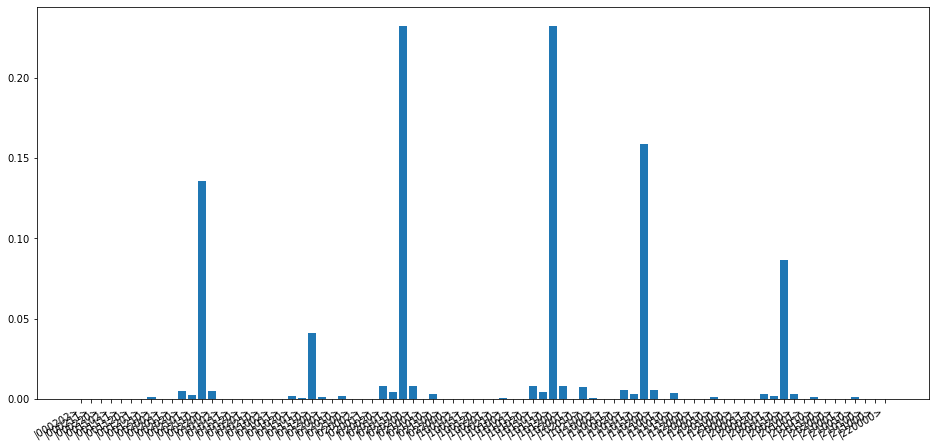

In [3]:
our_Probs = []
my_Modes = []
my_Modes2 = []

#find the all probs that not 0
for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            for l in range(0,3):
                for m in range(0, 3):
                    for n in range(0, 3):
                        if probs[i, j, k, l, m, n] != 0:
                            our_Probs.append(probs[i, j, k, l, m, n])
                            my_Modes.append(
                                "|" + str(i) + str(j) + str(k) + str(l) + str(m) + str(n) + ">")
                            print(my_Modes[-1] + ":", probs[i, j, k, l, m, n])
                            my_Modes2.append(
                                str(i) + str(j) + str(k) + str(l) + str(m) + str(n))

fig = plt.figure(figsize=(16,8))                    
plt.bar(my_Modes, our_Probs)
fig.autofmt_xdate()
plt.show()

In [4]:
start_My_VonNuemann_Time = time.time()

#Von-Nuemann Algorithm
code = ''
S1 = []
S2 = []
modes = my_Modes2
for k in range(len(modes)):
    for i in range(len(modes)):
        if i != (len(modes)-1):
            S1.append((modes[k]))
            S2.append((modes[i]))
        for j in range(len(modes[k])):
            if i == (len(modes)-1):
                break
            if (int(modes[k][j]) == 0) & (int(modes[i][j]) == 0):
                if j == 5:
                    code = code + ("/")
                    #print('code is: ', code)
                    break
            elif (int(modes[k][j]) == 0) & (int(modes[i][j]) != 0):
                code = code + '1'
                if j == 5:
                    code = code + ("/")
                    #print('code is: ', code)
                    break
            elif (int(modes[k][j]) != 0) & (int(modes[i][j]) == 0):
                code = code + '0'
                if j == 5:
                    code = code + ("/")
                    #print('code is: ', code)
                    break
            elif (int(modes[k][j]) != 0) & (int(modes[i][j]) != 0):
                if j == 5:
                    code = code + ("/")
                    #print('code is: ', code)
                    break

#we have shown (the states that don't generate code) with "/", then we split them by "/".
final_String = code.split("/")
#Remove empty strings from final String.
final_String[:] = [x for x in final_String if x]
#We count final String to get the probability of repeating them.
res = {}
for i in final_String:
    res[i] = final_String.count(i)

#Calculate Time of Von-Nuemann Algorithm
end_My_VonNuemann_Time = time.time()
my_VonNuemann_Time = end_My_VonNuemann_Time - start_My_VonNuemann_Time

print("The time of execution of Von-Nuemann is :", my_VonNuemann_Time)
print("Total execution time is :", my_BS_Time + my_VonNuemann_Time)

The time of execution of Von-Nuemann is : 0.7740111351013184
Total execution time is : 15.692190647125244


In [5]:
#We prepare Final String and find the probability
def prepareData(res):
    rn = list(res.keys())
    count_Of_No = list(res.values())
    probabilities = count_Of_No
    sum_No = 0
    for e in range(len(count_Of_No)):
        sum_No = sum_No + count_Of_No[e]

    for e in range(len(count_Of_No)):
        probabilities[e] = count_Of_No[e]/sum_No
    return (rn, probabilities)

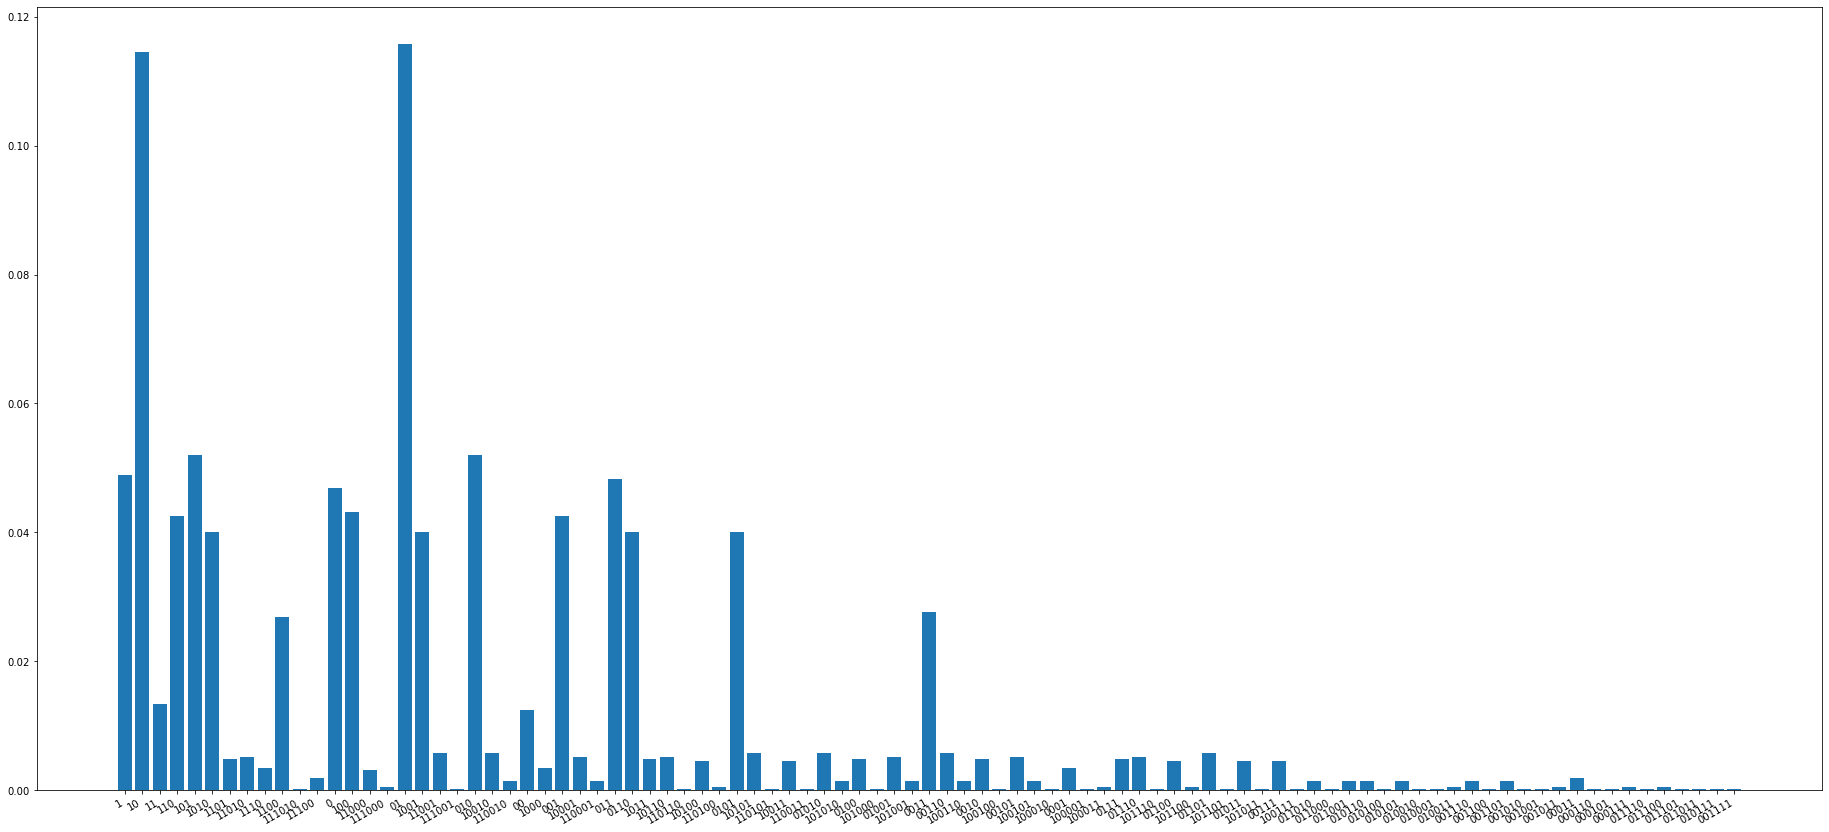

In [6]:
#We find the probability of any finalString.
my_Final_String, probabilities = prepareData(res)
fig = plt.figure(figsize=(32, 16))
plt.bar(range(len(res)), probabilities, tick_label=my_Final_String)
fig.autofmt_xdate()
plt.show()

In [7]:
# Creates a sorted dictionary (sorted by key)
def dictSorter(res):
    sorted_Res = dict(
        sorted(res.items(), key=lambda item: item[1], reverse=True))
    return sorted_Res

In [8]:
#We sorted them according to the obtained probability and then merged them together to get the final string.
#sorted_Res = dictSorter(res)
#my_Final_String, probabilities = prepareData(sorted_Res)

#fig = plt.figure(figsize=(16, 8))
#plt.bar(range(len(sorted_Res)), probabilities, tick_label=my_Final_String)
#fig.autofmt_xdate()
#plt.show()

In [9]:
#We convert string to integer to create bits!
def strToInt(list_Of_String):
    str1 = ''
    my_List = []
    for i in range(len(list_Of_String)):
        str1 = str1 + list_Of_String[i]
    my_List = [int(i) for i in str1]
    return my_List

In [10]:
#my_Random_Number = final_String
my_Bits = strToInt(my_Final_String)
print(my_Bits)

[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 

In [11]:
input_Data = open('input_Data.txt', 'w')
input_Data.write('S1:\n')
for s1 in range(len(S1)):
    input_Data.write('[' + str(S1[s1]) + ']')
input_Data.write('\n\n')
input_Data.write('S2:\n')
for s2 in range(len(S2)):
    input_Data.write('[' + str(S2[s2]) + ']')
input_Data.write('\n\n')
input_Data.write('coding:\n')
for c in range(len(code)):
    input_Data.write(str(code[c]))
input_Data.write('\n\n')
input_Data.write('Final Strings:\n')
for fs in range(len(final_String)):
    input_Data.write('[' + str(final_String[fs]) + ']')
input_Data.close()
#######################################
output_File = open('QRN.txt', 'w')
output_File.write('')

##seed random number generator and shuffle final String
shuffle_RN = my_Bits
seed(1)
shuffle(shuffle_RN)
##We convert string to integer to create bits!
my_Bits = shuffle_RN

QRN=''
for b in range(len(my_Bits)):
    QRN = QRN + str(my_Bits[b])
output_File.write(QRN)
output_File.close()
#######################################
print('S1:\n', S1)
print('\n')
print('S2:\n', S2)
print('\n')
print('coding:\n', code)
print('\n')
print('Final String:\n', final_String)
print('\n')
print('count of every Strings:\n', res)
print('\n')
print('Our Quantum Random Number:\n', QRN)
print('\n')


S1:
 ['000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000202', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000211', '000

In [12]:
# sp_800_approximate_entropy_test.py
#
# Copyright (C) 2017 David Johnston
# This program is distributed under the terms of the GNU General Public License.
#
# This file is part of sp800_22_tests.
#
# sp800_22_tests is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# sp800_22_tests is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with sp800_22_tests.  If not, see <http://www.gnu.org/licenses/>.
from __future__ import print_function

import math
from scipy.special import gamma, gammainc, gammaincc
#from gamma_functions import *

def bits_to_int(bits):
    theint = 0
    for i in range(len(bits)):
        theint = (theint << 1) + bits[i]
    return theint
        
def approximate_entropy_test(bits):
    n = len(bits)
    
    m = int(math.floor(math.log(n,2)))-6
    if m < 2:
        m = 2
    if m >3 :
        m = 3
        
    print("  n         = ",n)
    print("  m         = ",m)
    
    Cmi = list()
    phi_m = list()
    for iterm in range(m,m+2):
        # Step 1 
        padded_bits=bits+bits[0:iterm-1]
    
        # Step 2
        counts = list()
        for i in range(2**iterm):
            #print "  Pattern #%d of %d" % (i+1,2**iterm)
            count = 0
            for j in range(n):
                if bits_to_int(padded_bits[j:j+iterm]) == i:
                    count += 1
            counts.append(count)
            print("  Pattern %d of %d, count = %d" % (i+1,2**iterm, count))
    
        # step 3
        Ci = list()
        for i in range(2**iterm):
            Ci.append(float(counts[i])/float(n))
        
        Cmi.append(Ci)
    
        # Step 4
        sum = 0.0
        for i in range(2**iterm):
            if (Ci[i] > 0.0):
                sum += Ci[i]*math.log((Ci[i]/10.0))
        phi_m.append(sum)
        print("  phi(%d)    = %f" % (m,sum))
        
    # Step 5 - let the loop steps 1-4 complete
    
    # Step 6
    appen_m = phi_m[0] - phi_m[1]
    print("  AppEn(%d)  = %f" % (m,appen_m))
    chisq = 2*n*(math.log(2) - appen_m)
    print("  ChiSquare = ",chisq)
    # Step 7
    p = gammaincc(2**(m-1),(chisq/2.0))
    
    success = (p >= 0.01)
    return (success, p, None)

if __name__ == "__main__":
    bits = my_Bits
    success, p, _ = approximate_entropy_test(bits)
    
    print("success =",success)
    print("p = ",p)


  n         =  466
  m         =  2
  Pattern 1 of 4, count = 122
  Pattern 2 of 4, count = 110
  Pattern 3 of 4, count = 110
  Pattern 4 of 4, count = 124
  phi(2)    = -3.687305
  Pattern 1 of 8, count = 62
  Pattern 2 of 8, count = 60
  Pattern 3 of 8, count = 48
  Pattern 4 of 8, count = 62
  Pattern 5 of 8, count = 60
  Pattern 6 of 8, count = 50
  Pattern 7 of 8, count = 62
  Pattern 8 of 8, count = 62
  phi(2)    = -4.377523
  AppEn(2)  = 0.690218
  ChiSquare =  2.7297956538838295
success = True
p =  0.6040109161769565
